# Projeto de Ondas Localizadas - 2024/2
*Alunos responsáveis:*

**Brian Nicholas Alves Rondon Lahr - 12547805**

**Gustavo Mariano Kanaiama Pereira - 12547739**

In [2]:
import math
import cmath
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Pirmeiro modelamos o problema, ou seja, descrevemos os pontos de Fonte e os pontos dos receptores (nesse caso consideramos lambda igual à 1, pois colocamos em função do comprimento de onda)

In [3]:
def generate_source_receiver(lines, Hdist, Vdist):

  # Default source(left)-receiver(right)

  source = [(0, Vdist*x) for x in range(lines)][::-1]
  receiver = [(Hdist, Vdist*x) for x in range(lines)][::-1]

  return source, receiver

In [4]:
paralel_lines = 3
horiz_dist = 5
vetical_dist = 2

source, receiver = generate_source_receiver(paralel_lines, horiz_dist, vetical_dist)
print(source)
print(receiver)


[(0, 4), (0, 2), (0, 0)]
[(5, 4), (5, 2), (5, 0)]


Então criamos uma função que calculará a distância entre os dois pontos e os elementos da matriz GSR

In [5]:
def dist(A, B):
  return abs(math.sqrt((A[0]-B[0])**2 + (A[1] - B[1])**2))

def calc_gsr(src, rcv):
  return (-1/(4*math.pi))*cmath.exp(complex(0, 1)*2*math.pi*dist(src, rcv))/(dist(src, rcv))


Here the functions just show a formatted array and matrix of complex numbers, it trucates at 2th decimal.

In [6]:
def formatted_complex_array(array, decimals=2):
    return np.around(array.real, decimals) + 1j * np.around(array.imag, decimals)


def formatted_complex_matrix(matriz):
    matriz = np.array(matriz)

    return np.round(matriz.real, 2) + 1j * np.round(matriz.imag, 2)

Então podemos montar a matriz GSR  calculando elemento por elemento. Além disso definimos uma constante espacial para multiplicar a matriz GSR para tirar o fator 4*pi obtido pela função de Greeen. Dessa forma obtemos números e sinais mais convenientes:

In [7]:
GSR = list()
temp = list()

const = -4*math.pi*5

for si in source:
  for rj in receiver:

    temp.append(calc_gsr(si, rj)*const)


  GSR.append(temp.copy())
  temp = []

GSR = formatted_complex_matrix(GSR)
GSR

array([[ 1.  +0.j  , -0.7 +0.61j, -0.64+0.45j],
       [-0.7 +0.61j,  1.  +0.j  , -0.7 +0.61j],
       [-0.64+0.45j, -0.7 +0.61j,  1.  +0.j  ]])

Podemos então tirar o SVD da matriz GSR para obter os valores singulares (sj), e os vetores do espaço de receptor e do espaço de fontes (que estará com o dagger)

In [8]:
#Computing GSR(dagger)@GSR (Vh contains eigenvectors ATA)
_, s, Vh = np.linalg.svd(np.conjugate(np.transpose(GSR))@GSR)

state_vec_src = formatted_complex_matrix(np.conjugate(Vh.T))
strenght_coupl_values = s

#Computing GSR@GSR(dagger) (U contains eigenvectors AAT)
U, _, _ = np.linalg.svd(np.conjugate(np.transpose(GSR))@GSR)

state_vec_rcv = formatted_complex_matrix(U)

#Os dois são iguais pois a matriz GSR é simetrica
print(f"{state_vec_src}\n\n{state_vec_rcv}\n\n{strenght_coupl_values}")


[[-0.41+0.j   -0.71+0.j   -0.58+0.j  ]
 [ 0.81-0.09j  0.  +0.j   -0.58+0.06j]
 [-0.41+0.j    0.71+0.j   -0.58+0.j  ]]

[[-0.41+0.j   -0.71+0.j   -0.58+0.j  ]
 [ 0.81-0.09j  0.  +0.j   -0.58+0.06j]
 [-0.41+0.j    0.71+0.j   -0.58+0.j  ]]

[3.41049773 2.8921     1.37000227]


# Nove Fontes and Nove Receptores em Linhas Paralelas

In [9]:
lines = 9
Hdist = 5
Vdist = 0.5

src, rcv = generate_source_receiver(lines, Hdist, Vdist)

print(src)
print(rcv)

[(0, 4.0), (0, 3.5), (0, 3.0), (0, 2.5), (0, 2.0), (0, 1.5), (0, 1.0), (0, 0.5), (0, 0.0)]
[(5, 4.0), (5, 3.5), (5, 3.0), (5, 2.5), (5, 2.0), (5, 1.5), (5, 1.0), (5, 0.5), (5, 0.0)]


In [10]:
GSR = list()
temp = list()

const = -4*math.pi*5

for si in src:
  for rj in rcv:

    temp.append(calc_gsr(si, rj)*const)


  GSR.append(temp.copy())
  temp = []

formatted_complex_matrix(GSR)

array([[ 1.  +0.j  ,  0.98+0.16j,  0.8 +0.57j,  0.18+0.94j, -0.7 +0.61j,
        -0.75-0.48j,  0.42-0.75j,  0.65+0.5j , -0.64+0.45j],
       [ 0.98+0.16j,  1.  +0.j  ,  0.98+0.16j,  0.8 +0.57j,  0.18+0.94j,
        -0.7 +0.61j, -0.75-0.48j,  0.42-0.75j,  0.65+0.5j ],
       [ 0.8 +0.57j,  0.98+0.16j,  1.  +0.j  ,  0.98+0.16j,  0.8 +0.57j,
         0.18+0.94j, -0.7 +0.61j, -0.75-0.48j,  0.42-0.75j],
       [ 0.18+0.94j,  0.8 +0.57j,  0.98+0.16j,  1.  +0.j  ,  0.98+0.16j,
         0.8 +0.57j,  0.18+0.94j, -0.7 +0.61j, -0.75-0.48j],
       [-0.7 +0.61j,  0.18+0.94j,  0.8 +0.57j,  0.98+0.16j,  1.  +0.j  ,
         0.98+0.16j,  0.8 +0.57j,  0.18+0.94j, -0.7 +0.61j],
       [-0.75-0.48j, -0.7 +0.61j,  0.18+0.94j,  0.8 +0.57j,  0.98+0.16j,
         1.  +0.j  ,  0.98+0.16j,  0.8 +0.57j,  0.18+0.94j],
       [ 0.42-0.75j, -0.75-0.48j, -0.7 +0.61j,  0.18+0.94j,  0.8 +0.57j,
         0.98+0.16j,  1.  +0.j  ,  0.98+0.16j,  0.8 +0.57j],
       [ 0.65+0.5j ,  0.42-0.75j, -0.75-0.48j, -0.7 +0.61j,  0

In [11]:
# Computing GSR(dagger)@GSR
_, s, Vh = np.linalg.svd(np.conjugate(np.transpose(GSR))@GSR)

state_vec_src = formatted_complex_matrix(np.conjugate(Vh.T))
strenght_coupl_values = s

# Computing GSR@GSR(dagger)
U, _, _ = np.linalg.svd(np.conjugate(np.transpose(GSR))@GSR)

state_vec_rcv = formatted_complex_matrix(U)


print(f"{state_vec_src}\n\n{state_vec_rcv}\n\n{strenght_coupl_values}")

[[-0.17+0.j   -0.12+0.j   -0.38+0.j   -0.56+0.j   -0.55+0.j   -0.38+0.j
  -0.2 +0.j   -0.08+0.j    0.02+0.j  ]
 [-0.21-0.3j  -0.03-0.18j -0.31-0.32j -0.17-0.18j  0.1 +0.12j  0.3 +0.35j
   0.31+0.36j  0.2 +0.23j -0.08-0.09j]
 [ 0.02-0.47j  0.26-0.15j -0.11-0.24j  0.  +0.18j  0.03+0.34j  0.  +0.05j
  -0.04-0.37j -0.05-0.49j  0.03+0.3j ]
 [ 0.15-0.31j  0.45+0.09j -0.17+0.06j -0.09+0.28j  0.01-0.04j  0.1 -0.36j
   0.03-0.12j -0.1 +0.38j  0.13-0.47j]
 [ 0.  +0.j    0.5 +0.22j -0.28+0.19j -0.  +0.j    0.12-0.3j   0.  +0.j
  -0.15+0.38j  0.  +0.j   -0.22+0.52j]
 [-0.15+0.31j  0.45+0.09j -0.17+0.06j  0.09-0.28j  0.01-0.04j -0.1 +0.36j
   0.03-0.12j  0.1 -0.38j  0.13-0.47j]
 [-0.02+0.47j  0.26-0.15j -0.11-0.24j  0.  -0.18j  0.03+0.34j -0.  -0.05j
  -0.04-0.37j  0.05+0.49j  0.03+0.3j ]
 [ 0.21+0.3j  -0.03-0.18j -0.31-0.32j  0.17+0.18j  0.1 +0.12j -0.3 -0.35j
   0.31+0.36j -0.2 -0.23j -0.08-0.09j]
 [ 0.17+0.j   -0.12+0.j   -0.38+0.j    0.56+0.j   -0.55+0.j    0.38+0.j
  -0.2 +0.j    0.08+0.j    0

In [12]:
# Extraindo os 3 modos mais acoplados

# autovetores da fonte
columns_src = [state_vec_src[:, i] for i in range(state_vec_src.shape[1])]

# Aplicando a formula
eigenvec_source = columns_src[0]


def calc_beam(x1, y1, sources_loc, src_eigenvec):
  ac = 0
  for i, xy_source in enumerate(sources_loc):
    aval_dist = dist((x1, y1), xy_source)

    if aval_dist == 0:
      aval_dist = 0.0001

    ac += ((np.exp(complex(0, 1)*2*math.pi*aval_dist))/aval_dist)*src_eigenvec[i]

  result = (-1/(4*math.pi))*ac*math.sqrt(x1)

  return np.real(result)

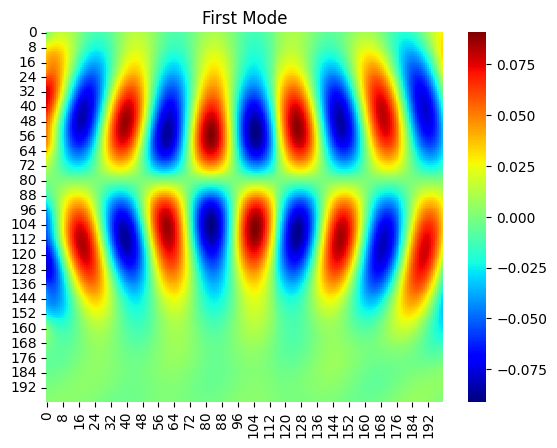

In [13]:

# Define x and y limits
x_values = np.linspace(0.2, 5, 200)  # 100 points between 0 and 5
y_values = np.linspace(0, 5, 200)  # 100 points between 0 and 4.5

# Create grid
X, Y = np.meshgrid(x_values, y_values)

# Apply the function calc_beam to each point of the grid
Z = np.zeros(X.shape)  # Create an empty matrix to storage the results

for i in range(X.shape[0]):  # For each row (y value)
    for j in range(X.shape[1]):  # For each column (x value)

        Z[i, j] = calc_beam(X[i, j], Y[i, j], src, eigenvec_source)  # input the tuple (x, y) to the function



# Create a heatmap using Seaborn
sns.heatmap(Z, cmap=plt.cm.jet)

# Show the plot
plt.title('First Mode')
plt.show()



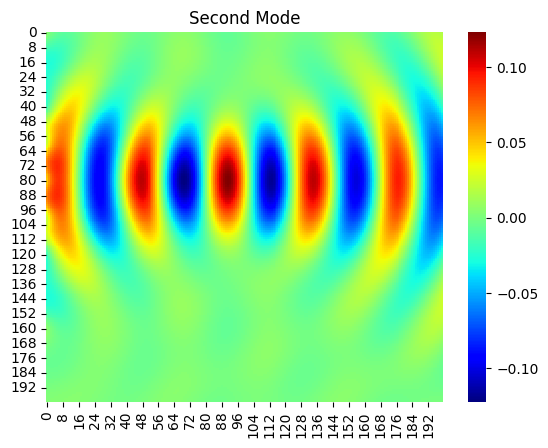

In [14]:
# For the second mode
eigenvec_source = columns_src[1]


Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):

        Z[i, j] = calc_beam(X[i, j], Y[i, j], src, eigenvec_source)



# Create a heatmap using Seaborn
sns.heatmap(Z, cmap=plt.cm.jet)

# Show the plot
plt.title('Second Mode')
plt.show()

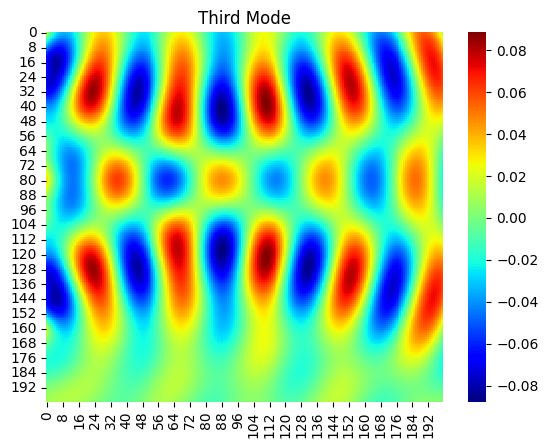

In [15]:
# For the third mode
eigenvec_source = columns_src[2]

# Apply calc_beam each point of the grid
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):

        Z[i, j] = calc_beam(X[i, j], Y[i, j], src, eigenvec_source)



# Create a heatmap using Seaborn
sns.heatmap(Z, cmap=plt.cm.jet)

# Show the plot
plt.title('Third Mode')
plt.show()